# Modelo de Regresión 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
import warnings

In [2]:
warnings.filterwarnings("ignore")
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import yfinance as yf
# Dataset de Microsoft Corporation (MSFT)
msft = yf.Ticker('MSFT')
df = msft.history(period="max", auto_adjust=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,0.000,0.000
1986-03-14,0.061,0.064,0.061,0.063,308160000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,0.000,0.000
...,...,...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200,0.000,0.000
2022-08-10,288.170,289.810,286.940,289.160,24687800,0.000,0.000
2022-08-11,290.850,291.210,286.510,287.020,20065900,0.000,0.000


In [5]:
#eliminamos las variables sin valores
df = df.drop(['Dividends'], axis='columns')
df = df.drop(['Stock Splits'], axis='columns')
df

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800
1986-03-14,0.061,0.064,0.061,0.063,308160000
1986-03-17,0.063,0.065,0.063,0.064,133171200
1986-03-18,0.064,0.065,0.062,0.063,67766400
1986-03-19,0.063,0.063,0.061,0.062,47894400
...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200
2022-08-10,288.170,289.810,286.940,289.160,24687800
2022-08-11,290.850,291.210,286.510,287.020,20065900


## Variables adicionales:

RSI (Indicador de fuerza relativa):

In [6]:
delta = df['Close'].diff()
up = delta.clip(lower = 0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
df['RSI'] = 100 - (100/(1+rs))
df

,Open,High,Low,Close,Volume,RSI
Date,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,NaN
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678
...,...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200,61.444
2022-08-10,288.170,289.810,286.940,289.160,24687800,65.845
2022-08-11,290.850,291.210,286.510,287.020,20065900,63.414


MACD:

In [7]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 -exp2
df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()

df.head()

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,NaN,0.000,0.000
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0.000


Eliminando valores perdidos (faltantes)

In [8]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
RSI            1
MACD           0
Signal line    0
dtype: int64

In [9]:
#Quitamos las filas que tengan el valor de NaN
df=df.dropna()
df

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0.000
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.310,0.000,0.000
...,...,...,...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200,61.444,5.907,4.229
2022-08-10,288.170,289.810,286.940,289.160,24687800,65.845,6.499,4.683
2022-08-11,290.850,291.210,286.510,287.020,20065900,63.414,6.718,5.090


Seleccionamos las características para los modelos

In [10]:
data = df[['Open', 'High', 'Low','Close', 'Volume','RSI', 'MACD']]
data.head()

,Open,High,Low,Close,Volume,RSI,MACD
Date,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.310,0.000


In [11]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9180 entries, 1986-03-14 to 2022-08-15
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9180 non-null   float64
 1   High    9180 non-null   float64
 2   Low     9180 non-null   float64
 3   Close   9180 non-null   float64
 4   Volume  9180 non-null   int64  
 5   RSI     9180 non-null   float64
 6   MACD    9180 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 573.8 KB


Dividimos los datos en entrenamiento y prueba

In [12]:
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = data.drop(['Close'],axis = 1)

# y es nuestra variable dependiente
y = data.Close

# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

## Modelo Regresión Lineal

**Elementos Importantes de la RL:**
* Método de regresión que presenta la relación entre una variable dependiente y varias variables explicativas independientes
* Se establece la minimización de los residuos para ajustar los parámetros del modelo
* En este desarrollo se presentará la minimización por mínimos cuadrados
* Considera presupuestos cómo : valor esperado 0 de los errores, varianza de los errores constate, distribución normal de los errores



Creamos el modelo

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [14]:
linear_model = LinearRegression()

Realizamos el entrenamiento (Ajuste de parámetros)

In [15]:
linear_model.fit(X_train, y_train)

LinearRegression()

Evaluamos el desempeño

In [16]:
R2 = linear_model.score(X_test,y_test)

y_test_predict = linear_model.predict(X_test)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("coeficiente de determinación R^2: ", R2)
print('----------------------------------------')
print('RMSE (root mean square error) nos da la diferencia entre los resultados reales y nuestros resultados calculados del modelo:')
print('Rmse ',RMSE)

coeficiente de determinación R^2:  0.9999482910614635
----------------------------------------
RMSE (root mean square error) nos da la diferencia entre los resultados reales y nuestros resultados calculados del modelo:
Rmse  0.4322438722125343


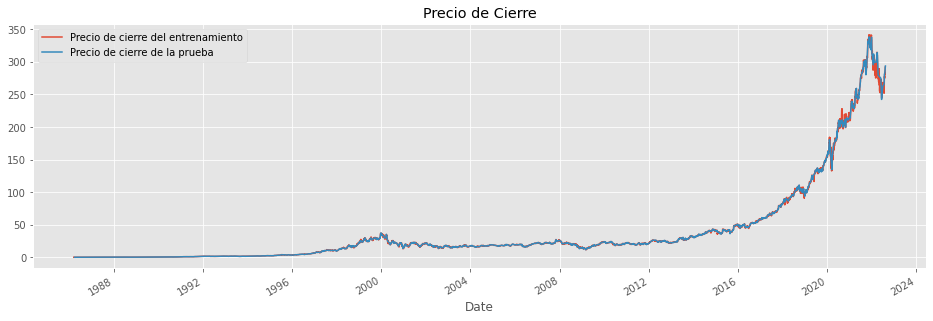

In [22]:
plt.figure(figsize=(16,5))
plt.title('Precio de Cierre')
y_train.plot(label='Precio de cierre del entrenamiento')
y_test.plot(label='Precio de cierre de la prueba')
plt.grid(True)
plt.legend()
plt.show()